# Analysis and Visualization of Complex Agro-Environmental Data
---
## Descriptive statistics

As an example we will work on a subset of a database that resulted from integrating information from several river fish biomonitoring programmes accross Europe. This subset includes data for some Mediterranean countries. Each case (rows) corresponds to a fish sampling point. Variables (columns) includes coordinates, country and catchment identifiers, local scale environmental variables, climatic variables, human pressures and fish presence/absence data.

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

We will be going over how to perform some basic visualisations in Python, and, most importantly, we will learn how to begin exploring data from a graphical perspective.

In [22]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

#### Import, visualize and summarize table properties

In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [3]:
print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [4]:
df.head(10)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,ES_02_0005,40.732830,-2.078003,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,ES_02_0006,40.788013,-2.152441,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,ES_02_0007,40.793682,-2.285236,Spain,Tejo,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
8,ES_02_0008,40.747652,-2.394504,Spain,Tejo,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,ES_02_0010,40.807161,-1.838133,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [6]:
list(df.columns)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

#### Clean and reajust the dataset

In [13]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [7]:
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes

Site_code                object
Latitude                float64
Longitude               float64
Country                  object
Catchment_name           object
                         ...   
Zingel asper              int64
Squalius sp               int64
Barbatula sp              int64
Phoxinus sp               int64
Iberochondrostoma_sp      int64
Length: 164, dtype: object

In [8]:
# Number of values per variable
df.count()

Site_code               5011
Latitude                5011
Longitude               5011
Country                 5011
Catchment_name          5011
                        ... 
Zingel asper            5011
Squalius sp             5011
Barbatula sp            5011
Phoxinus sp             5011
Iberochondrostoma_sp    5011
Length: 164, dtype: int64

### Handling missing data

In [9]:
# Number of missing values (NaN) per variable
df.isnull().sum()

Site_code               0
Latitude                0
Longitude               0
Country                 0
Catchment_name          0
                       ..
Zingel asper            0
Squalius sp             0
Barbatula sp            0
Phoxinus sp             0
Iberochondrostoma_sp    0
Length: 164, dtype: int64

In [30]:
df2 = df.dropna(how='all') # drops rows when all elements are missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [32]:
df2 = df.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [33]:
df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 18 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 3.6+ MB


### Numerical summaries

In [13]:
mean = df['prec_ann_catch'].mean()
median = df['prec_ann_catch'].median()
print(mean, median)

941.8238102610358 968.8983207


In [14]:
print(df['Catchment_name'].mode())

0    Ebro
dtype: object


In [15]:
# A fast way of getting a summary statistics of quantitative data (int or float)
df.describe() # before dropping NaNs

,Latitude,Longitude,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,Calib_morphol,Calib_wqual,Geomorph1,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,4.615000e+03,...,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
mean,41.660286,-4.220392,0.288964,0.790860,0.278388,0.811814,0.403313,0.460387,0.497306,4.550035e-12,...,0.000399,0.085412,0.000599,0.000399,0.012373,0.000200,0.196568,0.068250,0.132708,0.031132
std,1.654641,4.754419,0.453327,0.406735,0.448250,0.390900,0.490611,0.498478,0.500043,1.000108e+00,...,0.019976,0.279522,0.024463,0.019976,0.110554,0.014127,0.397442,0.252199,0.339293,0.173690
min,36.213984,-9.459453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.465112e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.450919,-7.716600,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.129179e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.316060,-6.176062,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.515341e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.904789,-1.959129,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.319150e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.098423,15.625773,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.345204e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df2.describe() # after dropping NaNs

,Latitude,Longitude,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,Calib_morphol,Calib_wqual,Geomorph1,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,...,2822.0,2822.000000,2822.000000,2822.0,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000
mean,41.931580,-6.706420,0.507442,0.633239,0.423459,0.742381,0.643161,0.556343,0.484054,0.274984,...,0.0,0.078668,0.001063,0.0,0.000354,0.0,0.253366,0.041460,0.091779,0.032601
std,1.584260,3.199233,0.500033,0.482006,0.494194,0.437400,0.479152,0.496903,0.499834,0.841953,...,0.0,0.269267,0.032593,0.0,0.018824,0.0,0.435016,0.199387,0.288765,0.177621
min,36.874237,-9.459453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.465112,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,41.214742,-8.226473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366619,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,42.542777,-7.556174,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.506130,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,43.078987,-6.728577,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.642102,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000
max,43.703384,15.509653,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.834520,...,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [17]:
country_count = pd.crosstab(index = df['Country'], columns='count')
print(country_count)

col_0     count
Country        
France       72
Italy       185
Portugal    867
Spain      3887


In [18]:
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
print(catchment_count)

col_0                  count
Catchment_name              
Algarve-Sotavento          6
Algarve-barlavento        10
Arno-Ombrone               2
Campania-South            19
Cantabrica               502
Catala                   242
Corse                      5
Douro                    401
Ebro                     736
EntreDouroeVouga           2
Galiza-Norte             709
Galiza-Sul                95
Garonne                    3
Guadalquivir              63
Guadia                   313
Italia-Veneto              1
Jucar                    103
Jucar-Ebro                52
Minho                    707
Mira                       5
Mondego                   86
Odelouca                  40
Oeste                     33
Ombrone                    5
Ombrone-Tevere             6
Rhone                     16
Sado                       9
Saline-Pescara-Sangro     29
Sardinia                  17
Segura                    42
Segura-Jucar               7
South_France_E            23
South_France_W

### Plotting qualitative data

Check here: https://seaborn.pydata.org/generated/seaborn.catplot.html

<AxesSubplot:xlabel='Country'>

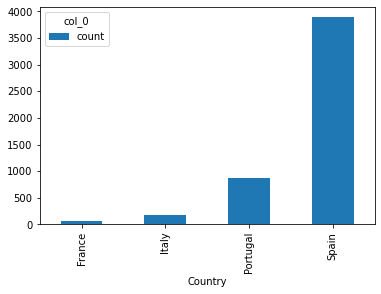

In [40]:
country_count.plot(kind='bar') # pandas function

<AxesSubplot:xlabel='Catchment_name'>

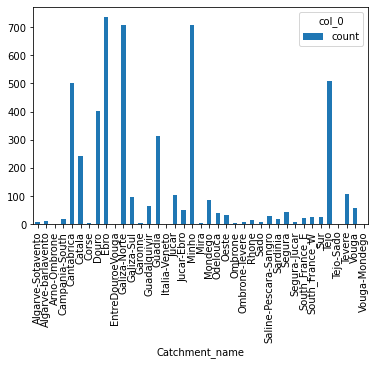

In [41]:
catchment_count.plot(kind='bar') # pandas function

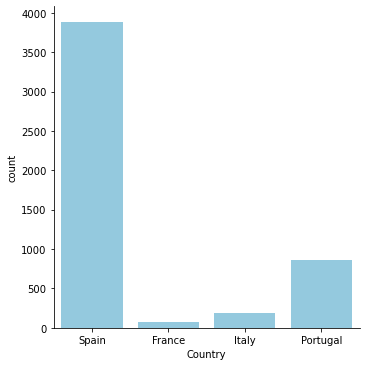

In [42]:
sns.catplot(x="Country", data=df, kind="count", color="skyblue")

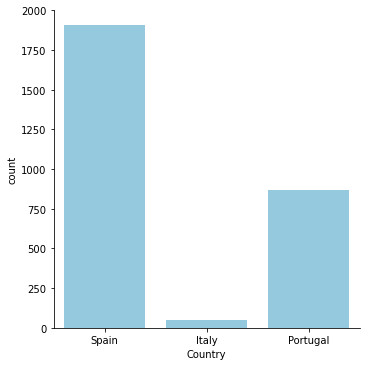

In [43]:
sns.catplot(x="Country", data=df2, kind="count", color="skyblue")

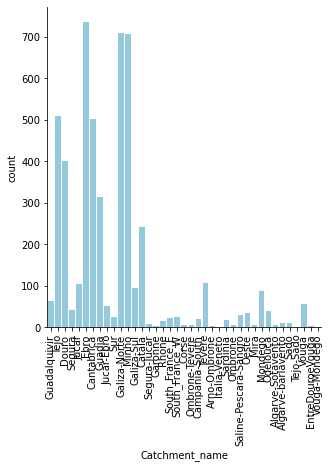

In [44]:
sns.catplot(x="Catchment_name", data=df, kind="count", color="skyblue")
plt.xticks(rotation=90)
plt.show()

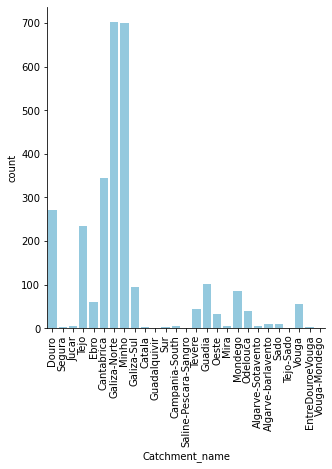

In [45]:
sns.catplot(x="Catchment_name", data=df2, kind="count", color="skyblue")
plt.xticks(rotation=90)
plt.show()

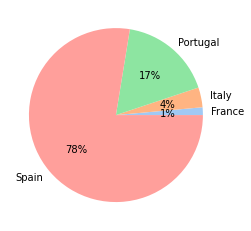

In [46]:

colors = sns.color_palette('pastel')
labels = ['France', 'Italy', 'Portugal', 'Spain']
plt.pie(list(country_count.iloc[:,0]), labels=labels, colors = colors, autopct = '%0.0f%%')
plt.show()

### Plotting quantitative data

#### Strip plots
check here: https://seaborn.pydata.org/generated/seaborn.stripplot.html

In [72]:
sns.stripplot(df2, y='prec_ann_catch')
plt.show()

/Users/tristanbertrand/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'prec_ann_catch'

#### Histograms
check here: https://seaborn.pydata.org/generated/seaborn.histplot.html

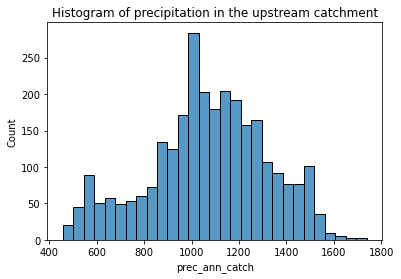

In [73]:
sns.histplot(df2['prec_ann_catch'], kde = False).set_title("Histogram of precipitation in the upstream catchment")
plt.show()

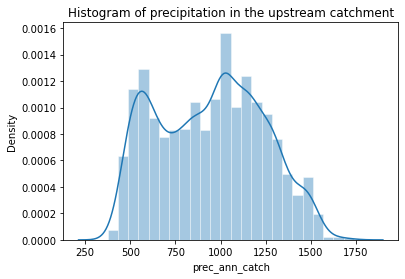

In [74]:
sns.histplot(
    df["prec_ann_catch"], 
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
).set_title("Histogram of precipitation in the upstream catchment")
plt.show()

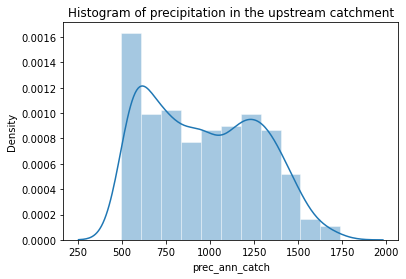

In [50]:
df_port = df[df['Country']=='Portugal']

sns.histplot(
    df_port["prec_ann_catch"], 
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
).set_title("Histogram of precipitation in the upstream catchment")
plt.show()


### Boxplots

Check here: https://seaborn.pydata.org/generated/seaborn.boxplot.html

/Users/tristanbertrand/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


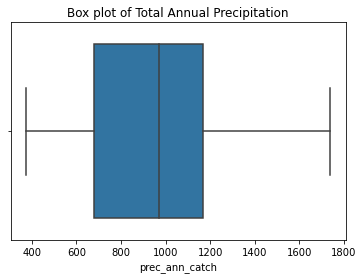

In [51]:
sns.boxplot(df["prec_ann_catch"]).set_title("Box plot of Total Annual Precipitation")
plt.show()

/Users/tristanbertrand/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


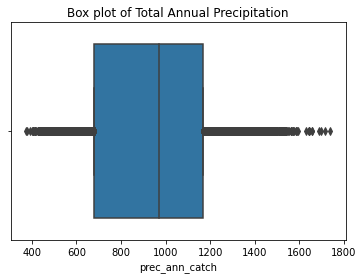

In [52]:
sns.boxplot(df["prec_ann_catch"], whis=0).set_title("Box plot of Total Annual Precipitation")
plt.show()

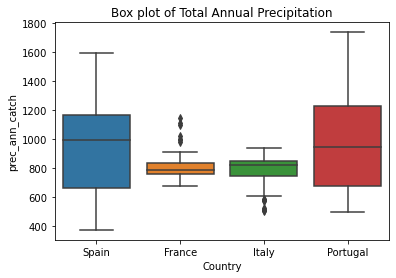

In [53]:
sns.boxplot(x="Country", y="prec_ann_catch", data=df).set_title("Box plot of Total Annual Precipitation")
plt.show()

### Violin plots

Check here: https://seaborn.pydata.org/generated/seaborn.violinplot.html

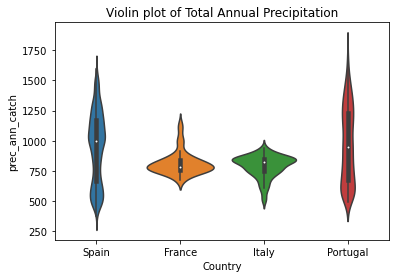

In [54]:
sns.violinplot(x="Country", y="prec_ann_catch", data=df).set_title("Violin plot of Total Annual Precipitation")
plt.show()

### Bar plots

Check here: https://seaborn.pydata.org/generated/seaborn.barplot.html

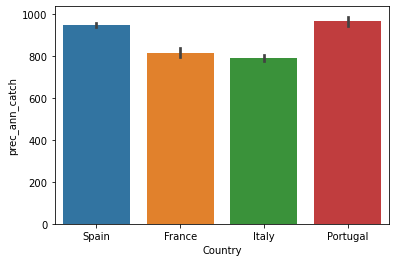

In [55]:
sns.barplot(x="Country", y="prec_ann_catch", data=df)
plt.show()

In [56]:
sns.barplot(data=df, x="Catchment_name", y="prec_ann_catch", estimator="mean")
plt.xticks(rotation=90)
plt.show()

TypeError: 'str' object is not callable

ASSIGNEMENT 3

In [20]:
# Get the top four sites with the highest count
top_four_sites = catchment_count.nlargest(4, 'count').index.tolist()

# Print the list of the top four sites
print(top_four_sites)

# Create an empty list for each site
site1_temps = []
site2_temps = []
site3_temps = []
site4_temps = []

# Filter the DataFrame for each site and extract the temperatures
for site in top_four_sites:
    temps_site = df[df['Catchment_name'] == site]['temp_ann'].tolist()
    if site == 'Ebro':
        site1_temps = temps_site
    elif site == 'Galiza-Norte':
        site2_temps = temps_site
    elif site == 'Minho':
        site3_temps = temps_site
    elif site == 'Tejo':
        site4_temps = temps_site

# Print the lists of temperatures for each site
print("Temperatures for site Ebro:", site1_temps)
print("Temperatures for site Galiza-Norte:", site2_temps)
print("Temperatures for site Minho:", site3_temps)
print("Temperatures for site Tejo:", site4_temps)


['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']
Températures pour le site Ebro: [7.4, 7.8, 9.1, 9.6, 9.8, 10.3, 6.8, 7.1, 8.5, 8.6, 9.6, 10.6, 7.6, 9.2, 10.5, 10.9, nan, 11.2, 12.0, 11.9, 12.0, 12.3, 12.0, 11.2, 11.3, 12.3, 11.9, 9.6, 9.6, 8.8, 11.5, 9.8, 10.4, 12.6, 13.1, 11.3, 12.3, 13.2, 13.0, 13.2, 13.4, 13.4, 13.5, 12.6, 12.7, 12.6, 13.0, 13.0, 13.2, 13.2, 13.4, 13.5, 13.6, 13.4, 13.7, 12.0, 12.0, 12.1, 12.3, 12.3, 12.3, 12.3, 12.3, 12.6, 12.6, 12.4, 12.4, 12.4, 12.3, 12.4, 10.8, 11.4, 11.7, 11.8, 12.0, 10.9, 11.2, 11.0, 11.5, 11.8, 11.6, 11.9, 12.0, 12.2, 12.3, 12.3, 12.9, 13.0, 13.0, 13.1, 13.1, 13.1, 13.2, 13.2, 13.3, 13.3, 13.3, 13.3, 13.4, 13.5, 13.5, 13.6, 13.5, 13.5, 13.7, 11.6, 9.1, 11.6, 9.4, 11.1, 11.4, 11.7, 11.7, 12.2, 9.0, 8.6, 9.5, 13.3, 13.2, 13.4, 13.4, 13.4, 13.4, 13.1, 13.5, 13.4, 13.3, 13.6, 13.5, 13.7, 13.7, 13.8, 13.8, 13.8, 13.9, 14.0, 14.1, 14.0, 11.7, 11.9, 12.2, 12.2, 12.5, 12.5, 12.6, 12.6, 12.6, 12.6, 12.8, 12.8, 12.8, 12.9, 13.0, 13.3, 13.3, 13.3, 13.4, 13.1,

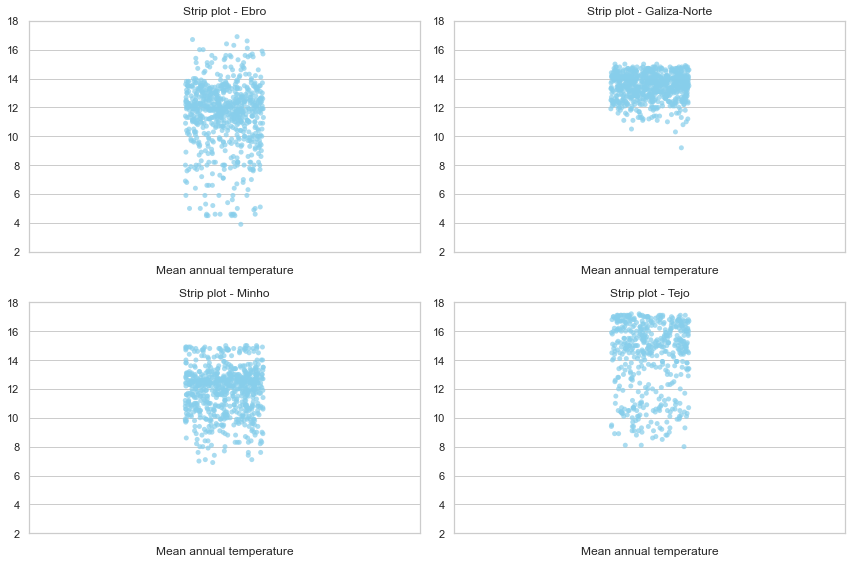

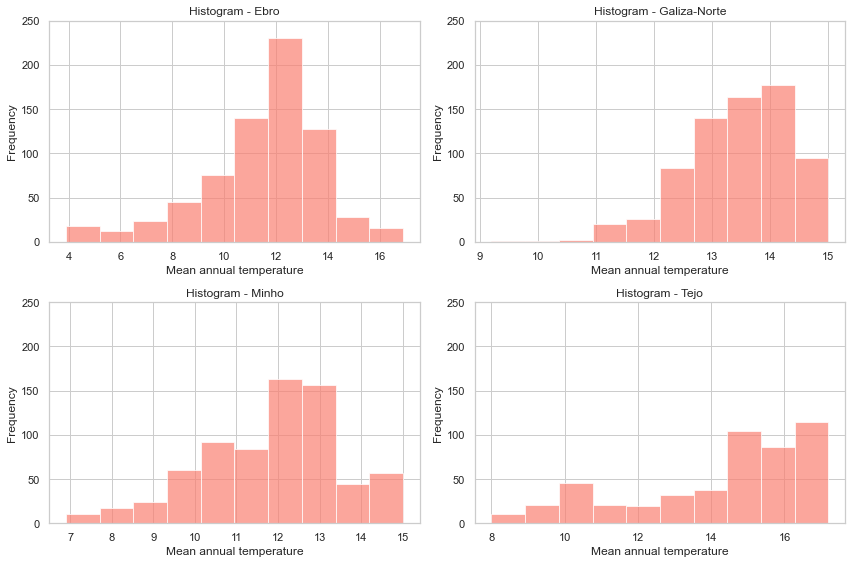

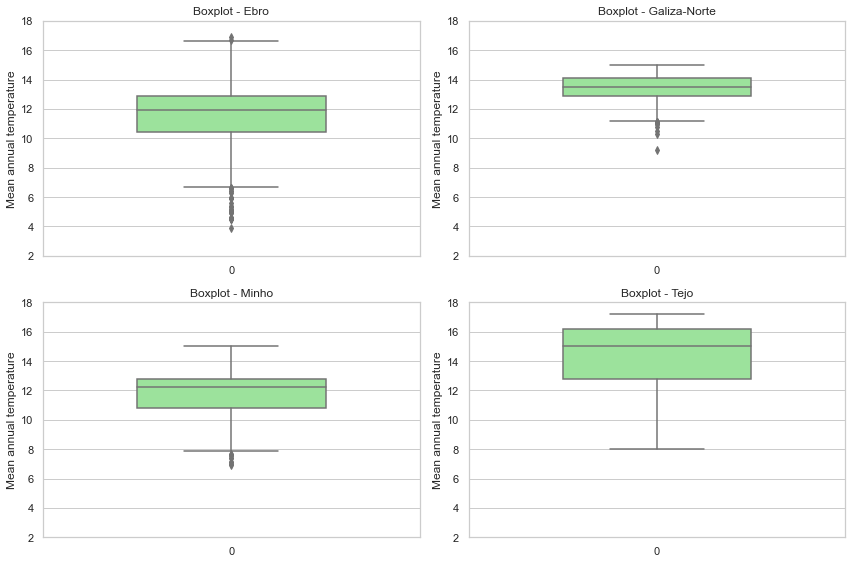

In [75]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Remove NaN values from the four lists of temperatures
site1_temps = [temp for temp in site1_temps if not np.isnan(temp)]
site2_temps = [temp for temp in site2_temps if not np.isnan(temp)]
site3_temps = [temp for temp in site3_temps if not np.isnan(temp)]
site4_temps = [temp for temp in site4_temps if not np.isnan(temp)]

# Set style
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(12, 8))

# Plot the strip plots for each site in subplots
for i, temps_site in enumerate([site1_temps, site2_temps, site3_temps, site4_temps]):
    plt.subplot(2, 2, i+1)
    sns.stripplot(y=temps_site, jitter=True, color='skyblue', alpha=0.7)
    plt.title('Strip plot - ' + sites_titles[i])
    plt.xlabel('Mean annual temperature')
    plt.ylabel('')
    plt.ylim(2, 18)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

# Create a new figure
plt.figure(figsize=(12, 8))

# Plot histograms for each site in subplots
for i, temps_site in enumerate([site1_temps, site2_temps, site3_temps, site4_temps]):
    plt.subplot(2, 2, i+1)
    plt.hist(temps_site, bins=10, color='salmon', alpha=0.7)
    plt.title('Histogram - ' + sites_titles[i])
    plt.xlabel('Mean annual temperature')
    plt.ylabel('Frequency')
    plt.ylim(0, 250)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

plt.figure(figsize=(12, 8))

# List of temperatures for each site
temperatures_sites = [site1_temps, site2_temps, site3_temps, site4_temps]

# Plot boxplots for each site in subplots
for i, temps_site in enumerate(temperatures_sites):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=temps_site, color='lightgreen',width=0.5)
    plt.title('Boxplot - ' + sites_titles[i])
    plt.ylabel('Mean annual temperature')
    plt.ylim(2, 18)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


STRIP PLOT

PROS: good vizualisation of the repartition (variance) / Easy to see the differnce of variance betwenn sites
CONS: No mean/mediane/standard deviation etc... 

HISTOGRAM
 
PROS: Good vizualisation of the repartition (variance) / Easy to see the differnce of variance betwenn sites / easier to "see" the mediane
CONS: No mean/mediane/standard deviation etc... / Loss of info in categorizing the data in integral number instead of float (14,23 -> 14)

BOXPLOT: 

PROS: Easy visualization of mean/mediane/standard deviation etc... / Easy to compare the differnets sites
CONS: Not verry aesthetic

In [73]:
# Initialize a dictionary to store the lists of sample means
random_samples = {
    1: [],
    10: [],
    50: [],
    100: [],
    150: [],
    200: [],
    250: [],
    300: [],
    500: [],
    1000: []
}

# Repeat the operation 1000 times for each sample size
for size in random_samples.keys():
    for _ in range(1000):
        # Randomly select 'size' values from the column 'Temp_ann'
        random_sample = df['temp_ann'].sample(n=size, replace=False)
        # Add the mean of the sample to the corresponding list in the dictionary
        random_samples[size].append(np.mean(random_sample))


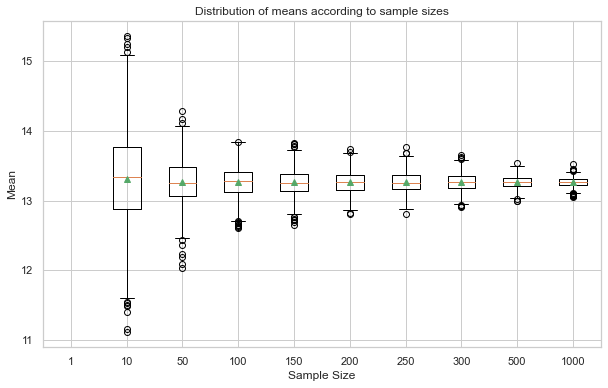

In [74]:
# Create a list of means for each sample size
sample_means = [random_samples[size] for size in sample_sizes]

# Create the boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(sample_means, labels=sample_sizes, showmeans=True)
plt.title('Distribution of means according to sample sizes')
plt.xlabel('Sample Size')
plt.ylabel('Mean')
plt.grid(True)
plt.show()
